In [ ]:
import torch

In [ ]:
with open("./first-names.txt","r") as f:
    words = f.read().splitlines()

In [ ]:
words = [word for word in words if ' ' not in word]
print(len(words))

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
itos = {i:s for i,s in enumerate(chars)}

stoi['.'] = 0
itos[0] = '.'

In [ ]:
print(len(stoi))

In [ ]:
print(len(stoi))
len(itos)

In [ ]:
#trigram takes two input predict the next one
xs, ys = [], []
for w in words:
    tmp = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(tmp,tmp[1:],tmp[2:]):
        input = []
        ix1, ix2, ix3 = stoi[ch1],stoi[ch2],stoi[ch3]
        input.append(ix1)
        input.append(ix2)

        xs.append(input)
        ys.append(ix3)


xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = int(xs.nelement() / 2)
print(num)


In [ ]:
xs

In [ ]:
#trigram takes two input predict the next one
xs, ys = [], []
for w in words:
    tmp = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(tmp,tmp[1:],tmp[2:]):
        input = []
        ix1, ix2, ix3 = stoi[ch1],stoi[ch2],stoi[ch3]
        input.append(ix1)
        input.append(ix2)

        xs.append(input)
        ys.append(ix3)


xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = int(xs.nelement() / 2)
print(num)

import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=54).float()
generator = torch.Generator().manual_seed(2147483647)
W1 = torch.randn((54,54),generator = generator, requires_grad=True)
W2 = torch.randn((54,54),generator = generator, requires_grad=True)



for i in range(100):
    logits = xenc[:,0,] @ W1 + xenc[:,1,] @ W2
    counts = torch.exp(logits)
    prob = counts / counts.sum()
    idx = torch.multinomial(prob,num_samples=1,replacement=True,generator=generator)
    loss = -prob[torch.arange(num),ys].log().mean()
    print(f"Loss : {loss}")

    W1.grad = None
    W2.grad = None
    loss.backward()

    W1.data += -0.5*W1.grad
    W2.data += -0.5*W2.grad





In [ ]:
torch.arange(18)
print(prob)
print(prob.shape)
print(prob[torch.arange(18),ys])
print(prob[3,ys[3]])

In [ ]:


for i in range(1000):
    logits = xenc[:,0,] @ W1 + xenc[:,1,] @ W2
    counts = torch.exp(logits)
    prob = counts / counts.sum()
    idx = torch.multinomial(prob,num_samples=1,replacement=True,generator=generator)
    loss = -prob[torch.arange(num),ys].log().mean()
    print(f"Loss : {loss}")

    W1.grad = None
    W2.grad = None
    loss.backward()

    W1.data += -50*W1.grad
    W2.data += -50*W2.grad





In [ ]:
prob[ys[1]]

In [ ]:
-prob[ys].log().mean()

In [ ]:

for i in range(50):
    out = []
    idx1 = 0
    idx2 = 1
    while True:
        logits = F.one_hot(torch.tensor(idx1), num_classes=54).float() @ W1 + F.one_hot(torch.tensor(idx2), num_classes=54).float() @ W2
        counts = logits.exp()
        prob = counts / counts.sum()
        idx = torch.multinomial(prob,num_samples=1,replacement=True,generator=generator)
        out.append(itos[idx.item()])
        if idx == 0:
            break
        idx1 = idx2
        idx2 = idx.item()
    print(''.join(out))


Makemore using MLP

In [ ]:
import torch
import torch.nn.functional as F
with open("./first-names.txt","r") as f:
    words = f.read().splitlines()

words = [word for word in words if ' ' not in word]
print(len(words))

chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
itos = {i:s for i,s in enumerate(chars)}

stoi['.'] = 0
itos[0] = '.'

In [ ]:
len(stoi)

In [ ]:
X , Y = [], []
block_size = 3  #How much previous characters need to take

for w in words:
    w = w + '.'
    context_list = [0] * 3
    for c in w:
        X.append(context_list)
        Y.append(stoi[c])
        context_list = context_list[1:] + [stoi[c]]
    
X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
X.shape

In [ ]:
X[24]

In [ ]:
emb = torch.randn((54,2))

In [ ]:
emb[0]

In [ ]:
emb = emb[X]
emb.shape

In [1]:
import torch
import torch.nn.functional as F
with open("./first-names.txt","r") as f:
    words = f.read().splitlines()

words = [word for word in words if ' ' not in word and '-' not in word]
print(len(words))

chars = sorted(list(set(''.join(words))))

stoi = {s:i+1 for i,s in enumerate(chars)}
itos = {i+1:s for i,s in enumerate(chars)}

stoi['.'] = 0
itos[0] = '.'

print(len(stoi))
print(len(itos))

4921
53
53


In [2]:
# words = words[:3]
# print(words)

In [2]:
def build_dataset(words):
    X , Y = [], []
    block_size = 3  #How much previous characters need to take

    for w in words:
        w = w + '.'
        context_list = [0] * block_size
        for c in w:
            X.append(context_list)
            Y.append(stoi[c])
            context_list = context_list[1:] + [stoi[c]]
        
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

import random
random.seed(32)
random.shuffle(words)
n1 = int(len(words)*0.8)
n2 = int(len(words)*0.9)

x_train, y_train = build_dataset(words[:n1])
x_val, y_val = build_dataset(words[n1:n2])
x_dev, y_dev = build_dataset(words[n2:])

print(x_train.shape)
print(x_val.shape)
print(x_dev.shape)

torch.Size([27962, 3])
torch.Size([3486, 3])
torch.Size([3446, 3])


In [3]:
generator = torch.Generator().manual_seed(2147483647)
C = torch.randn((53,10), generator=generator) #Lookup table
W1 = torch.randn((30,250), generator=generator)
W2 = torch.randn((250,53), generator=generator)
b1 = torch.randn((250), generator=generator)
b2 = torch.randn((53), generator=generator)

params = [C,W1, b1, W2, b2]
for p in params:
    p.requires_grad = True
total_params = sum(p.nelement() for p in params) #total params of this model

print(f"Total Parameters : {total_params}")



Total Parameters : 21583


In [7]:
for _ in range(15000):
    #minibatch for better performance
    ix = torch.randint(0, x_train.shape[0],(32,)) # -- > batch size is 32

    #Forward Pass
    emb = C[x_train[ix]] #shape --> 34,3,2
    emb = emb.view(-1,30)
    h = torch.tanh(( emb @ W1 ) + b1)   # --> 34,100
    logits = (h @ W2) + b2

    loss = F.cross_entropy(logits,y_train[ix])

    #Backward pass
    for p in params:
        p.grad = None

    loss.backward()

    #Update
    for p in params:
        p.data += -0.01 * p.grad



In [8]:
#Total loss
emb = C[x_train] #shape --> 34,3,2
emb = emb.view(-1,30)
h = torch.tanh(( emb @ W1 ) + b1)   # --> 34,100
logits = (h @ W2) + b2

loss = F.cross_entropy(logits,y_train)
print(f"Train loss: {loss}")

Train loss: 1.5891625881195068


In [9]:
#Total loss
emb = C[x_val] #shape --> 34,3,2
emb = emb.view(-1,30)
h = torch.tanh(( emb @ W1 ) + b1)   # --> 34,100
logits = (h @ W2) + b2

loss = F.cross_entropy(logits,y_val)
print(f"Val loss: {loss}")

Val loss: 2.0589640140533447


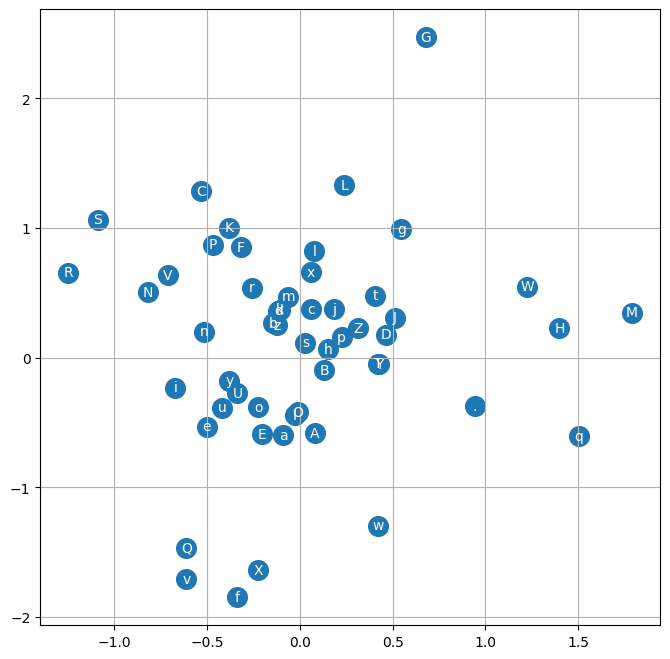

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

In [16]:
g = torch.Generator().manual_seed(2147483647 + 11)

for _ in range(20):
    out = []
    context = [0] * 3
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(( emb.view(1,-1) @ W1 ) + b1)   # --> 34,100
        logits = (h @ W2) + b2
        probs = F.softmax(logits)
        ix = torch.multinomial(probs, num_samples=1,generator=g)

        out.append(ix)
        context = context[1:] + [ix]
        if ix == 0:
            break
    
    print(''.join(itos[i.item()] for i in out))
        

Ronnetta.
Krisa.
Bernandy.
Anta.
Karina.
Diana.
Kathrystanthellie.
Maxy.
Karlie.
Shee.
Zlina.
Doree.
Aile.
Dionelle.
Julia.
Salanee.
Robitheanon.
Fannabellsa.
Kitta.
Doeanorten.


C:\Users\User\AppData\Local\Temp\ipykernel_14212\1941866271.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = F.softmax(logits)
